In [2038]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2039]:
df = pd.read_csv(r'C:\Users\talia\OneDrive\שולחן העבודה\data science project\car details regresion.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# cleanning the data and visualization

Let us get rid of the unnecessary features.

In [2040]:
df.drop(['torque'], axis = 1, inplace = True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [2041]:
df.shape

(8128, 12)

In [2042]:
df.head(14)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0


In [2043]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [2044]:
df.dropna(inplace=True)
df.head(14)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0


In [2045]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [2046]:
df['seats'].value_counts()

5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [2047]:
df['year'].value_counts()

2017    1010
2016     856
2018     806
2015     775
2013     668
2012     621
2014     620
2019     583
2011     570
2010     375
2009     231
2008     201
2007     173
2006     102
2005      76
2020      74
2004      51
2003      37
2002      19
2000      16
1999      14
1997       9
1998       9
2001       6
1994       2
1996       2
1995       1
Name: year, dtype: int64

In [2048]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   object 
 5   seller_type    7907 non-null   object 
 6   transmission   7907 non-null   object 
 7   owner          7907 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7907 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 803.1+ KB


In [2049]:
over_2500000=df.loc[df['selling_price']>2000000]
over_2500000.count()

name             356
year             356
selling_price    356
km_driven        356
fuel             356
seller_type      356
transmission     356
owner            356
mileage          356
engine           356
max_power        356
seats            356
dtype: int64

In [2050]:
df = df[df['selling_price']<2000000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7506 non-null   object 
 1   year           7506 non-null   int64  
 2   selling_price  7506 non-null   int64  
 3   km_driven      7506 non-null   int64  
 4   fuel           7506 non-null   object 
 5   seller_type    7506 non-null   object 
 6   transmission   7506 non-null   object 
 7   owner          7506 non-null   object 
 8   mileage        7506 non-null   object 
 9   engine         7506 non-null   object 
 10  max_power      7506 non-null   object 
 11  seats          7506 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.3+ KB


Text(0.5, 1.0, 'Distributional of price')

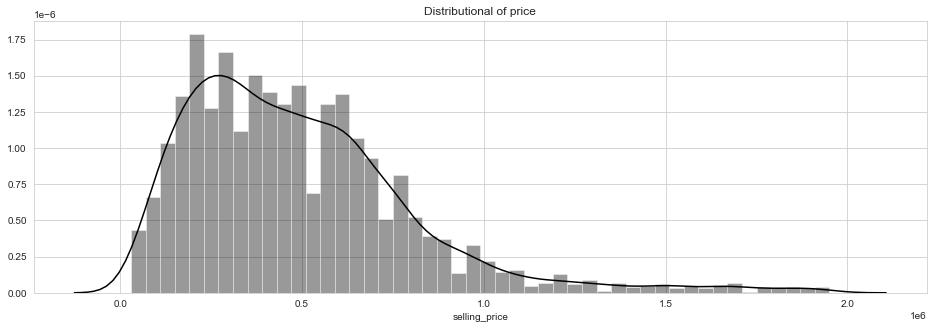

In [2051]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["selling_price"], color="black",ax = axes)
plt.title("Distributional of price")

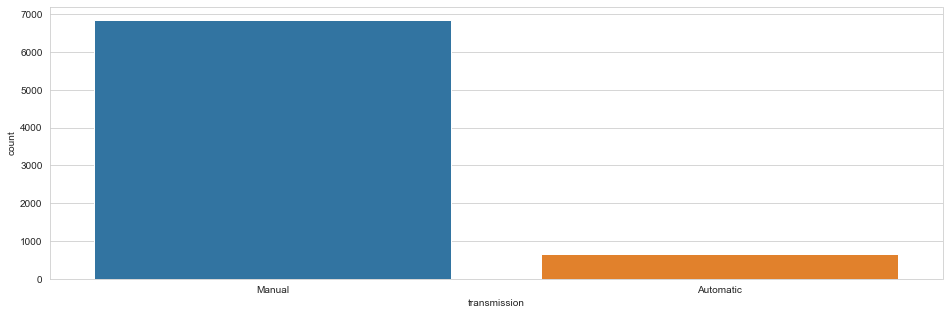

In [2052]:
plt.figure(figsize = (16,5))
sns.countplot(x = df['transmission'])

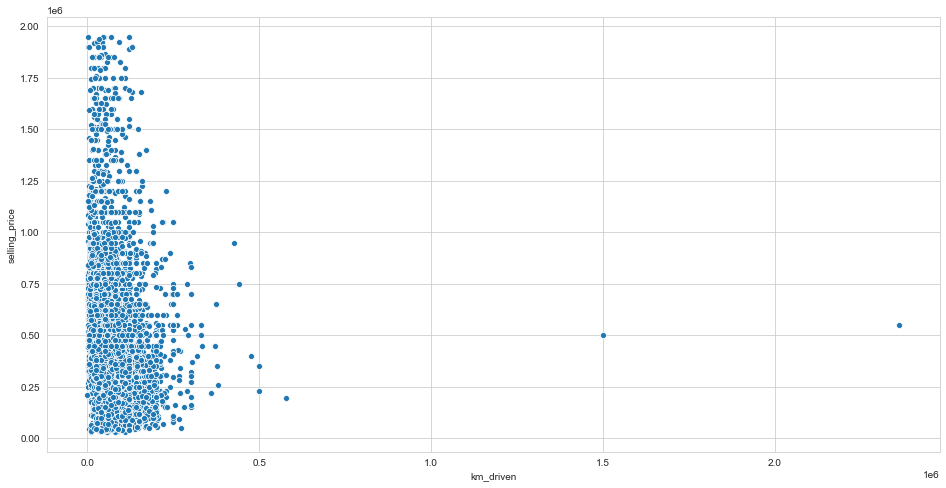

In [2053]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = df["km_driven"], y = df["selling_price"])

In [2054]:
over_1500000=df.loc[df['km_driven']>=1500000]
over_1500000.count()

name             2
year             2
selling_price    2
km_driven        2
fuel             2
seller_type      2
transmission     2
owner            2
mileage          2
engine           2
max_power        2
seats            2
dtype: int64

In [2055]:
df = df[df['km_driven']<1500000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7504 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7504 non-null   object 
 1   year           7504 non-null   int64  
 2   selling_price  7504 non-null   int64  
 3   km_driven      7504 non-null   int64  
 4   fuel           7504 non-null   object 
 5   seller_type    7504 non-null   object 
 6   transmission   7504 non-null   object 
 7   owner          7504 non-null   object 
 8   mileage        7504 non-null   object 
 9   engine         7504 non-null   object 
 10  max_power      7504 non-null   object 
 11  seats          7504 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


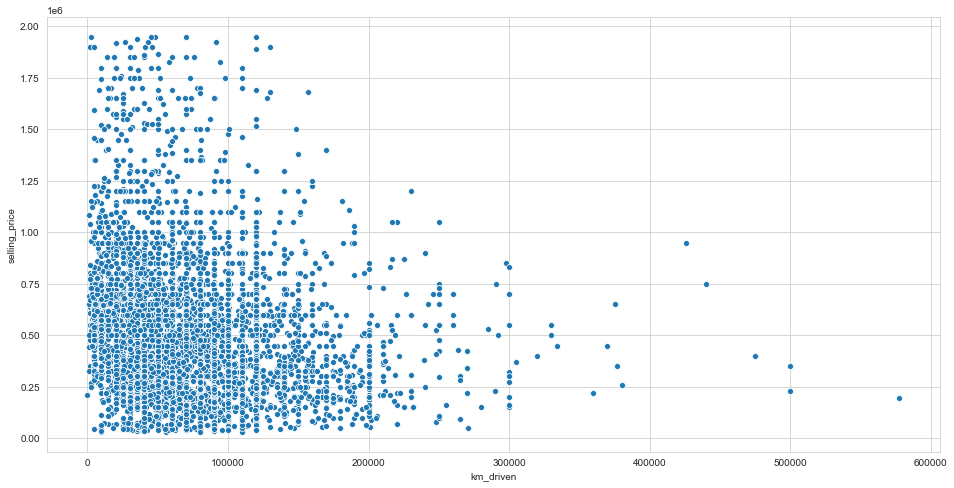

In [2056]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = df["km_driven"], y = df["selling_price"])

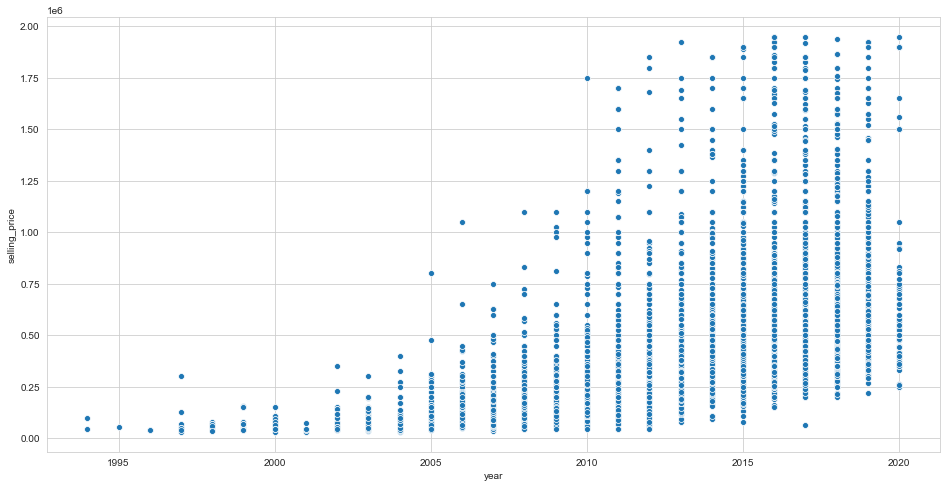

In [2057]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = df["year"], y = df["selling_price"])

In [2058]:
under_1995=df.loc[df['year'] < 1995]
under_1995.count()

name             2
year             2
selling_price    2
km_driven        2
fuel             2
seller_type      2
transmission     2
owner            2
mileage          2
engine           2
max_power        2
seats            2
dtype: int64

In [2059]:
df = df[df['year'] > 1995]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7501 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7501 non-null   object 
 1   year           7501 non-null   int64  
 2   selling_price  7501 non-null   int64  
 3   km_driven      7501 non-null   int64  
 4   fuel           7501 non-null   object 
 5   seller_type    7501 non-null   object 
 6   transmission   7501 non-null   object 
 7   owner          7501 non-null   object 
 8   mileage        7501 non-null   object 
 9   engine         7501 non-null   object 
 10  max_power      7501 non-null   object 
 11  seats          7501 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 761.8+ KB


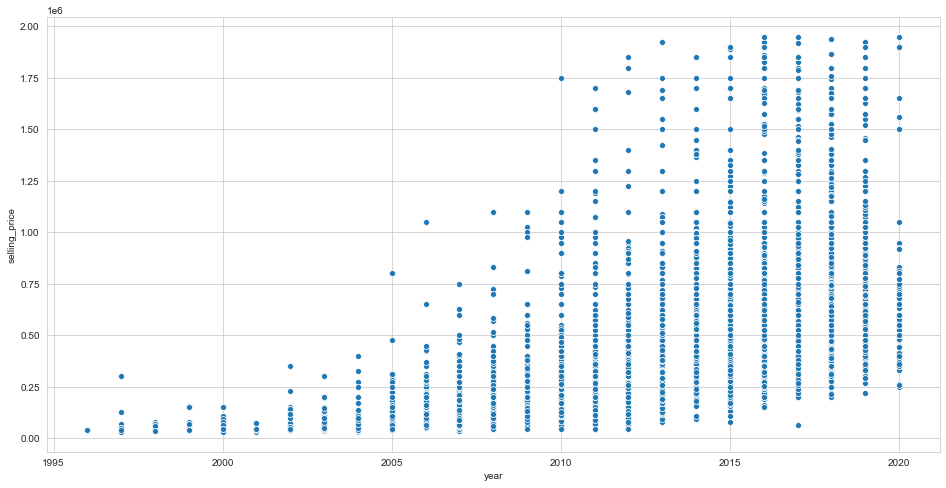

In [2060]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = df["year"], y = df["selling_price"])

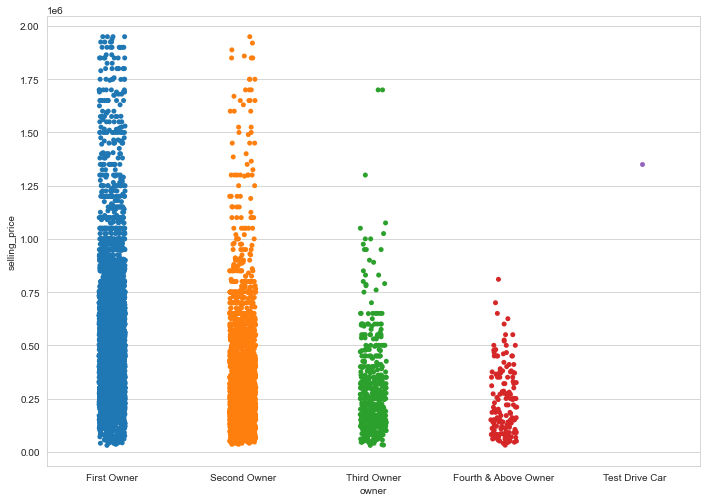

In [2061]:
var = 'owner'
f1, ax = plt.subplots()
f1.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='selling_price', data = df) 

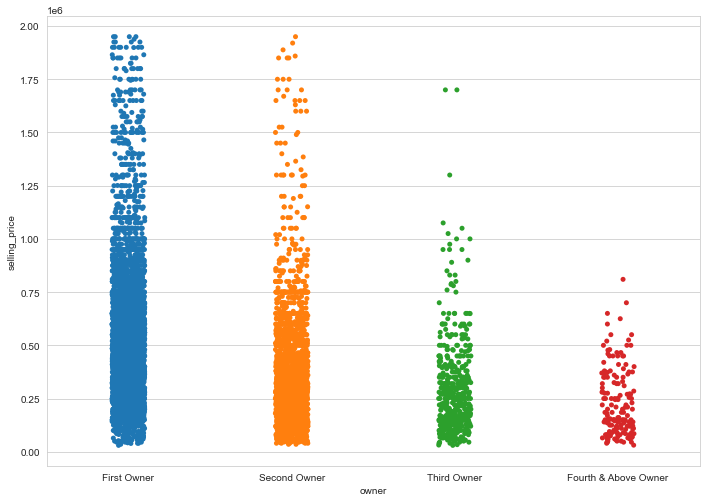

In [2062]:
df = df[df.owner != "Test Drive Car"] 
var = 'owner'
f1, ax = plt.subplots()
f1.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='selling_price', data = df) 

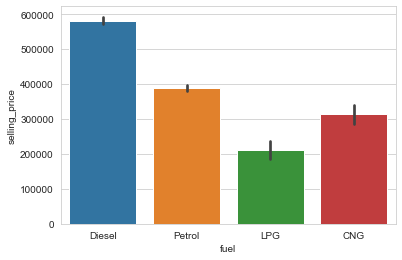

In [2063]:
sns.barplot('fuel', 'selling_price', data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

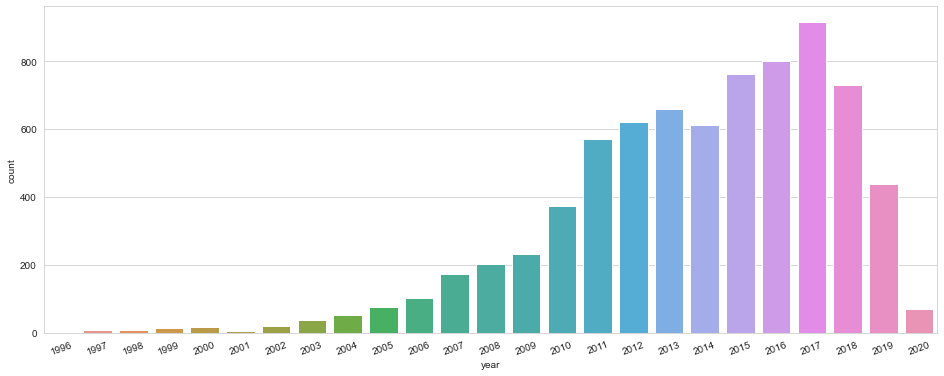

In [2064]:
plt.figure(figsize = (16,6))
sns.countplot(df['year'])
plt.xticks(rotation = 20)
# majority cars present on the site were brought in the year 2017

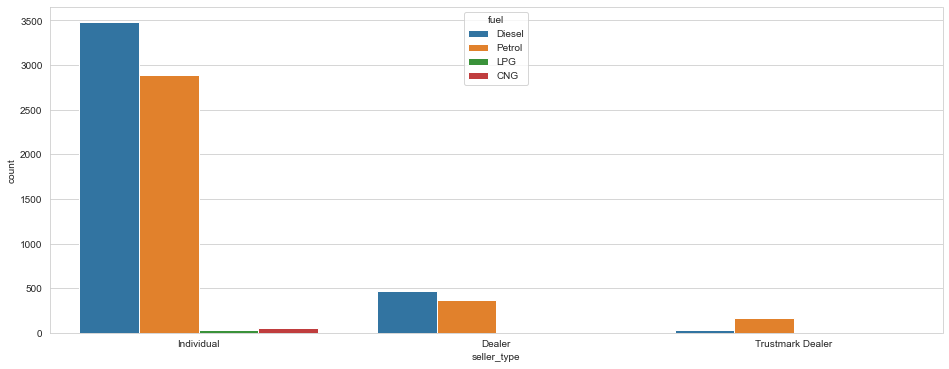

In [2065]:
plt.figure(figsize = (16,6))
sns.countplot(df['seller_type'], hue = df['fuel'])
# individual sellers mostly sell cars of fuel type diesel and petrol

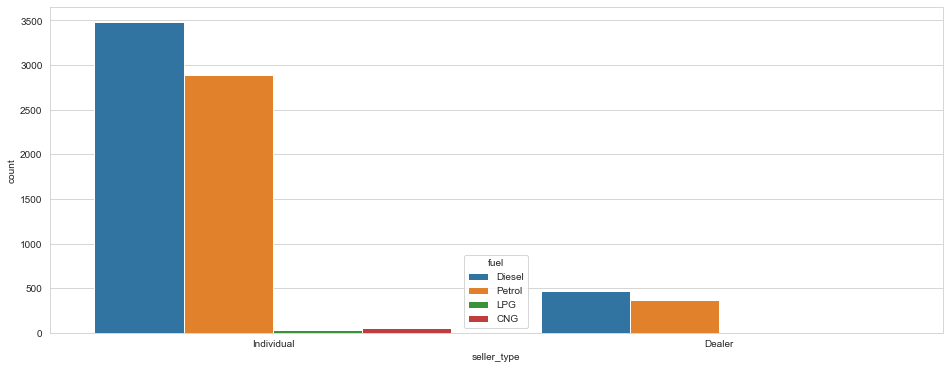

In [2066]:
df = df[df.seller_type != "Trustmark Dealer"] 
plt.figure(figsize = (16,6))
sns.countplot(df['seller_type'], hue = df['fuel'])

# Normalize the data

In [2067]:
#make the data numeric
#fuel:
df['fuel'] = df['fuel'].replace('Diesel',1, regex=True) 
df['fuel'] = df['fuel'].replace('Petrol',2, regex=True) 
df['fuel'] = df['fuel'].replace('LPG',3, regex=True) 
df['fuel'] = df['fuel'].replace('CNG',4, regex=True) 
#owner:
df['owner'] = df['owner'].replace('First Owner',1, regex=True)
df['owner'] = df['owner'].replace('Second Owner',2, regex=True)
df['owner'] = df['owner'].replace('Third Owner',3, regex=True)
df['owner'] = df['owner'].replace('Fourth & Above Owner',4, regex=True)
#transmission:
df['transmission'] = df['transmission'].replace('Manual',1, regex=True)
df['transmission'] = df['transmission'].replace('Automatic',2, regex=True)
#seller_type:
df['seller_type'] = df['seller_type'].replace('Individual',1, regex=True)
df['seller_type'] = df['seller_type'].replace('Dealer',2, regex=True)
#normalize 
df['selling_price'] = df['selling_price'].apply(lambda x : x/10000)

In [2068]:
#let's have the number (the first word) out of the string
df['engine'] = df['engine'].str.split().str[0]
df['max_power'] = df['max_power'].str.split().str[0]
df = df[df.max_power != 'bhp']

In [2069]:
#well here we need to eraser the last 5 letters from the 'mileage' feature 
df['mileage']= df['mileage'].str[:-5]
df['mileage']= df['mileage'].astype(float);

In [2070]:
#we dont need the car name now
df.drop(['name'], axis = 1, inplace = True)
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,45.0,145500,1,1,1,1,23.40,1248,74,5.0
1,2014,37.0,120000,1,1,1,2,21.14,1498,103.52,5.0
2,2006,15.8,140000,2,1,1,3,17.70,1497,78,5.0
3,2010,22.5,127000,1,1,1,1,23.00,1396,90,5.0
4,2007,13.0,120000,2,1,1,1,16.10,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,32.0,110000,2,1,1,1,18.50,1197,82.85,5.0
8124,2007,13.5,119000,1,1,1,4,16.80,1493,110,5.0
8125,2009,38.2,120000,1,1,1,1,19.30,1248,73.9,5.0
8126,2013,29.0,25000,1,1,1,1,23.57,1396,70,5.0


# Modeling

In [2071]:
from sklearn.model_selection import train_test_split
train = df.drop('selling_price', axis=1)
test = df["selling_price"]
# Split data
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.15, random_state=42)

### linear regression model

In [2072]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [2073]:
print('LinearRegression score:' , + lr.score(X_test,y_test))

LinearRegression score: 0.6914501194850141


In [2074]:
y_pred = lr.predict(X_test)
mse_model = mean_squared_error(y_pred, y_test)
print('Mean Squared Error on test data: ', + mse_model)
rmse_model = np.sqrt(mean_squared_error(y_pred, y_test))
print('Root Mean Squared Error:', + rmse_model)

Mean Squared Error on test data:  254.9333225792057
Root Mean Squared Error: 15.966631535148725


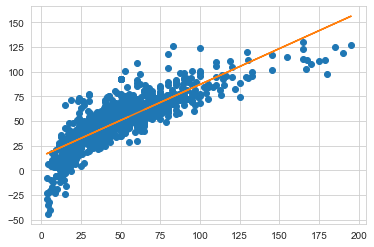

In [2075]:
plt.plot(y_test, y_pred, 'o')
ln, b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test,ln*y_test+b)

### dummy model

In [2076]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(train, test)
dummy_pred = lr.predict(train)
print('Dummy LinearRegression score:', + dummy_regr.score(train, test))

Dummy LinearRegression score: -0.03204916804496638


In [2077]:
mse_dummy = mean_squared_error(dummy_pred, test)
print('Mean Squared Error on test data: ', + mse_dummy)
rmse_dummy = np.sqrt(mean_squared_error(dummy_pred, test))
print('Root Mean Squared Error:', + rmse_dummy)

Mean Squared Error on test data:  295.30917245321183
Root Mean Squared Error: 17.184562038446362


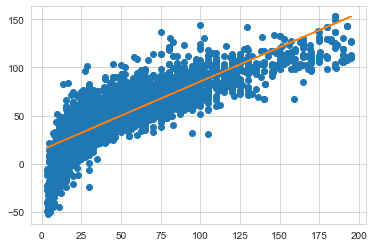

In [2078]:
plt.plot(test, dummy_pred, 'o')
ln, b = np.polyfit(test, dummy_pred,1)
plt.plot(test,ln*test+b)

### Random Forest Regressor model

In [2079]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print('RandomForestRegressor score:' , + rf_reg.score(X_test,y_test))

RandomForestRegressor score: 0.8978077973400603


In [2080]:
mse_rf = mean_squared_error(y_pred, y_test)
print('Mean Squared Error on test data: ', + mse_rf)
rmse_rf = np.sqrt(mean_squared_error(y_pred, y_test))
print('Root Mean Squared Error:', + rmse_rf)

Mean Squared Error on test data:  84.43431487415737
Root Mean Squared Error: 9.188814660997215


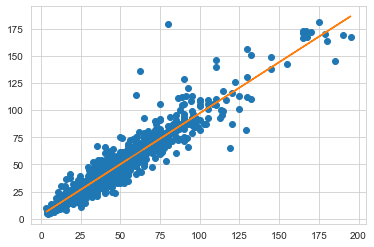

In [2081]:
plt.plot(y_test, y_pred, 'o')
ln, b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test,ln*y_test+b)

# well, we can see that there is an improvment with this model!